<a href="https://colab.research.google.com/github/NithishC/ColabNotebook/blob/master/Keras_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy.random import seed
seed(555)
from tensorflow import set_random_seed
set_random_seed(555)
import os 
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

In [0]:
pic = array_to_img(x_train[7])
label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck',]

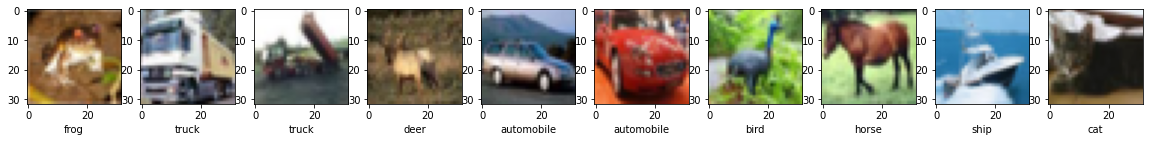

In [5]:
plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  pic=array_to_img(x_train[i])
  plt.imshow(pic)
  plt.xlabel(label[y_train[i][0]])


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train = x_train.reshape(len(x_train),32*32*3)
x_test = x_test.reshape(len(x_test),32*32*3)

In [0]:
x_train = x_train / 255.0 
x_test = x_test / 255.0 

In [9]:
print(x_train.shape,x_test.shape[0])

(50000, 3072) 10000


In [0]:
size_of_val=x_test.shape[0]
x_val = x_train[:size_of_val]
y_val = y_train[:size_of_val]
x_train=x_train[size_of_val:]
y_train=y_train[size_of_val:]

In [11]:
x_train.shape

(40000, 3072)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model_1 = Sequential()
model_1.add(Dense(units=128, input_dim=32*32*3, activation='relu', name='hidden1'))
model_1.add(Dense(units=64, activation='relu', name='hidden2'))
model_1.add(Dense(16, activation='relu', name='hidden3'))
model_1.add(Dense(10, activation='softmax', name='output'))


model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(32*32*3,)))
model_2.add(Dense(128, activation='relu', name='hidden1'))
model_2.add(Dense(64, activation='relu', name='hidden2'))
model_2.add(Dense(15, activation='relu', name='hidden3'))
model_2.add(Dense(10, activation='softmax', name='output'))

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(32*32*3,)))
model_3.add(Dense(128, activation='relu', name='hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name='hidden2'))
model_3.add(Dense(15, activation='relu', name='hidden3'))
model_3.add(Dense(10, activation='softmax', name='output'))

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard
dir='drive/My Drive/tensorboard_cifar_logs/'
def get_tensorboard(model_name):

    folder_name = f'{model_name} 1 '
    dir_paths = os.path.join(dir, folder_name)

    os.makedirs(dir_paths)

    return TensorBoard(log_dir=dir_paths)

In [30]:
model_1.fit(x_train, y_train,batch_size=1000, epochs=150,verbose=0,callbacks=[get_tensorboard('Model 1 ')])